<a href="https://colab.research.google.com/github/YuliannaG/DataScienceHW5/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [2]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 11.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=fcf7df804a7bbada7c3fafb06d12cdc4125c141c02f6363bc108e82315fe8ce0
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [39]:
import pandas as pd
import pyspark
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from pyspark.sql import Row
from pyspark.sql import SparkSession


spark_session = SparkSession.builder.appName("books").getOrCreate()

path = "/content/drive/MyDrive/books.csv"

rdd = spark_session.read.csv(path).rdd
#rdd = spark.read.option("header",'True').csv(path).rdd

print("The data has {} columns".format(len(rdd.first())))

header = rdd.first()
print(header)

The data has 7 columns
Row(_c0='Name', _c1='Author', _c2='User Rating', _c3='Reviews', _c4='Price', _c5='Year', _c6='Genre')


Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7

In [24]:
#https://datascienceplus.com/dataframes-vs-rdds-in-spark-part-1/

content = rdd.filter(lambda line: line != header)

prices = content.filter(lambda line: line[2] > '4.7').map(lambda line:float(line[4])).collect()
avg_price = np.mean(prices)
print(f'Average price of books with raiting > 4.7 is {avg_price}')

Average price of books with raiting > 4.7 is 10.69832402234637


Построить гистограмму распределения рецензий (столбец Reviews).

([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000], [325, 119, 79, 11, 4, 7, 2, 2, 1])
([37.0, 8817.4, 17597.8, 26378.199999999997, 35158.6, 43939.0, 52719.399999999994, 61499.799999999996, 70280.2, 79060.59999999999, 87841.0], [287, 131, 87, 25, 4, 8, 5, 0, 0, 3])


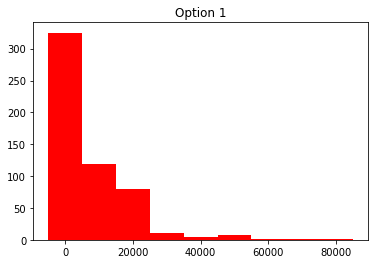

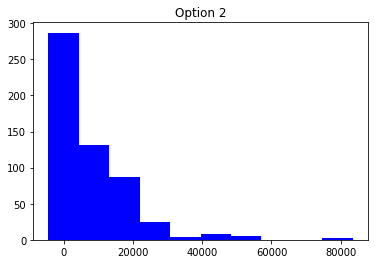

In [52]:
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.histogram.html

reviews = content.map(lambda line:float(line[3]))

hist1 = reviews.histogram([0,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])
print(hist1)

hist2 = reviews.histogram(10)
print(hist2)


fig1 = plt.figure("Option 1")
heights1 = np.array(hist1[1])
full_bins1 = hist1[0]
mid_point_bins1 = full_bins1[:-1]
widths1 = [abs(i - j) for i, j in zip(full_bins1[:-1], full_bins1[1:])]
plt.bar(mid_point_bins1, heights1, width=widths1, color='r')
plt.title("Option 1")

plt.show()

fig2 = plt.figure("Option 1")
heights2 = np.array(hist2[1])
full_bins2 = hist2[0]
mid_point_bins2 = full_bins2[:-1]
widths2 = [abs(i - j) for i, j in zip(full_bins2[:-1], full_bins2[1:])]
plt.bar(mid_point_bins2, heights2, width=widths2, color='b')
plt.title("Option 2")

plt.show()

Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".

In [84]:
from pyspark.mllib.stat import Statistics

rating = content.map(lambda line:float(line[2]))
reviews = content.map(lambda line:float(line[3]))
price = content.map(lambda line:float(line[4]))
all3rdd = content.map(lambda line:[float(line[2]),float(line[3]),float(line[4])])
Statistics.corr(rating, reviews, method = 'pearson')

# CANNOT MAKE THE MATRIXS WITH CORRELATION OF ALL 3 PARAMETERS
# .corr(rating, reviews, price)

# correlations = rating.corr()
# print(correlations)
# sns.heatmap(correlations)

-0.001729014255550007

Используя библиотеку seaborn построить парные графики (pairplots) столбцов "User Rating", "Reviews" и "Price".

In [97]:
ratingreviews = content.map(lambda line:[float(line[2]),float(line[3])]).toDF()

print(ratingreviews)

sns.pairplot(ratingreviews)

DataFrame[_1: double, _2: double]


TypeError: ignored